# Manipulating data and metadata in cf-python

## Homepage https://ncas-cms.github.io/cf-python

## Contents:

### 1. Read, inspect, write netCDF files
### 2. Subspace
### 3. Data
### 4. Calculate statistics
### 5. PP nad UM datasets

In [1]:
import cf
cf.__version__

'3.0.6a1'

# 1. Read, inspect and write files
https://ncas-cms.github.io/cf-python/function/cf.read.html

In [2]:
f = cf.read('ncas_data/IPSL-CM5A-LR_r1i1p1_tas_n96_rcp45_mnth.nc')[0]

In [3]:
f

<CF Field: air_temperature(time(120), latitude(145), longitude(192)) K>

In [4]:
print(f)

Field: air_temperature (ncvar%tas)
----------------------------------
Data            : air_temperature(time(120), latitude(145), longitude(192)) K
Cell methods    : time(120): mean (interval: 30 minutes)
Dimension coords: time(120) = [1959-12-16 12:00:00, ..., 1969-11-16 00:00:00] 365_day
                : latitude(145) = [-90.0, ..., 90.0] degrees_north
                : longitude(192) = [0.0, ..., 358.125] degrees_east
                : height(1) = [2.0] m



In [5]:
f.dump()

----------------------------------
Field: air_temperature (ncvar%tas)
----------------------------------
CDI = 'Climate Data Interface version 1.7.0 (http://mpimet.mpg.de/cdi)'
CDO = 'Climate Data Operators version 1.7.0 (http://mpimet.mpg.de/cdo)'
Conventions = 'CF-1.5'
_FillValue = 1.0000000200408773e+20
associated_files = 'baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation
                    gridspecFile: gridspec_atmos_fx_IPSL-
                    CM5A-LR_historical_r0i0p0.nc areacella: areacella_fx_IPSL-
                    CM5A-LR_historical_r0i0p0.nc'
branch_time = 1850.0
cmor_version = '2.5.1'
comment = 'This 20th century simulation include natural and anthropogenic
           forcings.'
contact = 'ipsl-cmip5 _at_ ipsl.jussieu.fr Data manager : Sebastien Denvil'
creation_date = '2011-02-23T17:52:35Z'
experiment = 'historical'
experiment_id = 'historical'
forcing = 'Nat,Ant,GHG,SA,Oz,LU,SS,Ds,BC,MD,OC,AA'
frequency = 'mon'
history = "Thu May 26 15:47:13 2016: cdo mergetime 

### Properties

In [6]:
f.properties()

{'Conventions': 'CF-1.5',
 'comment': 'This 20th century simulation include natural and anthropogenic forcings.',
 'model_id': 'IPSL-CM5A-LR',
 'CDI': 'Climate Data Interface version 1.7.0 (http://mpimet.mpg.de/cdi)',
 'parent_experiment_id': 'piControl',
 'creation_date': '2011-02-23T17:52:35Z',
 'frequency': 'mon',
 'references': 'Model documentation and further reference available here : http://icmc.ipsl.fr',
 'title': 'IPSL-CM5A-LR model output prepared for CMIP5 historical',
 'original_name': 't2m',
 'contact': 'ipsl-cmip5 _at_ ipsl.jussieu.fr Data manager : Sebastien Denvil',
 'source': 'IPSL-CM5A-LR (2010) : atmos : LMDZ4 (LMDZ4_v5, 96x95x39); ocean : ORCA2 (NEMOV2_3, 2x2L31); seaIce : LIM2 (NEMOV2_3); ocnBgchem : PISCES (NEMOV2_3); land : ORCHIDEE (orchidee_1_9_4_AR5)',
 'experiment': 'historical',
 'realization': 1,
 'project_id': 'CMIP5',
 'institute_id': 'IPSL',
 'initialization_method': 1,
 'product': 'output',
 'tracking_id': '826ee5e9-3cc9-40a6-a42b-d84c6b4aad97',
 'cmor_

In [7]:
f.get_property('project_id')

'CMIP5'

In [8]:
f.set_property('project_id', 'banana')
f.get_property('project_id')

'banana'

In [9]:
f.del_property('project_id')
f.get_property('project_id')  # This should fail!

ValueError: 'Field' has no 'project_id' property

In [10]:
f.get_property('project_id', 'UNSET')

'UNSET'

In [11]:
help(f.get_property)

Help on method get_property in module cf.mixin.properties:

get_property(prop, default=ValueError()) method of cf.field.Field instance
    Get a CF property.
        
    .. seealso:: `clear_properties`, `del_property`, `has_property`,
                 `properties`, `set_property`
    
    .. versionadded:: 3.0.0
    
    :Parameters:
    
        prop: `str`
            The name of the CF property.
    
            *Parameter example:*
               ``prop='long_name'``
    
        default: optional
            Return the value of the *default* parameter if the
            property does not exist. If set to an `Exception` instance
            then it will be raised instead.
    
    :Returns:
    
            The value of the named property or the default value, if
            set.
    
    **Examples:**
    
    
    >>> f.set_property('project', 'CMIP7')
    >>> f.has_property('project')
    True
    >>> f.get_property('project')
    'CMIP7'
    >>> f.del_property('project')
    '

### Shorthand for named CF properties
http://cfconventions.org/Data/cf-conventions/cf-conventions-1.7/cf-conventions.html#attribute-appendix

In [12]:
print(f.standard_name)
f.standard_name = 'banana'
print(f.standard_name)
del(f.standard_name)
f.standard_name = 'air_temperature'
print(f.standard_name)

air_temperature
banana
air_temperature


### Reading many files

In [13]:
fl = cf.read('ncas_data/data[2-7].nc')
fl

[<CF Field: air_temperature(long_name=t(1), long_name=p(1), latitude(160), longitude(320)) K>,
 <CF Field: air_temperature(long_name=t(1), long_name=p(1), long_name=latitude(256), long_name=longitude(512)) K>,
 <CF Field: eastward_wind(time(1), pressure(37), latitude(256), longitude(512)) m s**-1>,
 <CF Field: eastward_wind(time(1), pressure(23), latitude(160), longitude(320)) m s**-1>,
 <CF Field: eastward_wind(time(1), pressure(23), latitude(36), longitude(48)) m s**-1>,
 <CF Field: northward_wind(time(1), pressure(23), latitude(36), longitude(48)) m s**-1>,
 <CF Field: air_temperature(time(1680), latitude(73), longitude(96)) K>]

### A `FieldList` object inherits all of the usual Python `list` functionality 

In [14]:
for x in fl:
    print('IDENTITY:', x.identity(), 'SHAPE:', x.shape, 'UNITS:', x.units)

IDENTITY: air_temperature SHAPE: (1, 1, 160, 320) UNITS: K
IDENTITY: air_temperature SHAPE: (1, 1, 256, 512) UNITS: K
IDENTITY: eastward_wind SHAPE: (1, 37, 256, 512) UNITS: m s**-1
IDENTITY: eastward_wind SHAPE: (1, 23, 160, 320) UNITS: m s**-1
IDENTITY: eastward_wind SHAPE: (1, 23, 36, 48) UNITS: m s**-1
IDENTITY: northward_wind SHAPE: (1, 23, 36, 48) UNITS: m s**-1
IDENTITY: air_temperature SHAPE: (1680, 73, 96) UNITS: K


### Select by list position

In [15]:
g = fl[0]
g

<CF Field: air_temperature(long_name=t(1), long_name=p(1), latitude(160), longitude(320)) K>

In [16]:
fl[4:]

[<CF Field: eastward_wind(time(1), pressure(23), latitude(36), longitude(48)) m s**-1>,
 <CF Field: northward_wind(time(1), pressure(23), latitude(36), longitude(48)) m s**-1>,
 <CF Field: air_temperature(time(1680), latitude(73), longitude(96)) K>]

### Select by metadata
https://ncas-cms.github.io/cf-python/tutorial.html#sorting-and-selecting-from-field-lists

In [17]:
fl.select('air_temperature')

[<CF Field: air_temperature(long_name=t(1), long_name=p(1), latitude(160), longitude(320)) K>,
 <CF Field: air_temperature(long_name=t(1), long_name=p(1), long_name=latitude(256), long_name=longitude(512)) K>,
 <CF Field: air_temperature(time(1680), latitude(73), longitude(96)) K>]

In [18]:
fl.select('northward_wind')

[<CF Field: northward_wind(time(1), pressure(23), latitude(36), longitude(48)) m s**-1>]

In [19]:
fl.select_by_units('km h-1')

[]

In [20]:
fl.select_by_units('km h-1', exact=False)

[<CF Field: eastward_wind(time(1), pressure(37), latitude(256), longitude(512)) m s**-1>,
 <CF Field: eastward_wind(time(1), pressure(23), latitude(160), longitude(320)) m s**-1>,
 <CF Field: eastward_wind(time(1), pressure(23), latitude(36), longitude(48)) m s**-1>,
 <CF Field: northward_wind(time(1), pressure(23), latitude(36), longitude(48)) m s**-1>]

In [21]:
import re
fl.select(re.compile('(east|north)ward_wind'))

[<CF Field: eastward_wind(time(1), pressure(37), latitude(256), longitude(512)) m s**-1>,
 <CF Field: eastward_wind(time(1), pressure(23), latitude(160), longitude(320)) m s**-1>,
 <CF Field: eastward_wind(time(1), pressure(23), latitude(36), longitude(48)) m s**-1>,
 <CF Field: northward_wind(time(1), pressure(23), latitude(36), longitude(48)) m s**-1>]

# Write fields to a netCDF file
https://ncas-cms.github.io/cf-python/function/cf.write.html

In [22]:
cf.write(f, 'new_file.nc')

In [23]:
g = cf.read('new_file.nc')[0]
f.equals(g)

True

# 2. Subspace a field


### Index-space: [square brackets] 
https://ncas-cms.github.io/cf-python/tutorial.html#subspacing-by-index

In [24]:
f

<CF Field: air_temperature(time(120), latitude(145), longitude(192)) K>

In [25]:
print(f[0, 0, 0])

Field: air_temperature (ncvar%tas)
----------------------------------
Data            : air_temperature(time(1), latitude(1), longitude(1)) K
Cell methods    : time(1): mean (interval: 30 minutes)
Dimension coords: time(1) = [1959-12-16 12:00:00] 365_day
                : latitude(1) = [-90.0] degrees_north
                : longitude(1) = [0.0] degrees_east
                : height(1) = [2.0] m



In [26]:
f[0:6, :, :]

<CF Field: air_temperature(time(6), latitude(145), longitude(192)) K>

### Metadata-space: (`subspace` method)
https://ncas-cms.github.io/cf-python/tutorial.html#subspacing-by-metadata

In [27]:
print(f)

Field: air_temperature (ncvar%tas)
----------------------------------
Data            : air_temperature(time(120), latitude(145), longitude(192)) K
Cell methods    : time(120): mean (interval: 30 minutes)
Dimension coords: time(120) = [1959-12-16 12:00:00, ..., 1969-11-16 00:00:00] 365_day
                : latitude(145) = [-90.0, ..., 90.0] degrees_north
                : longitude(192) = [0.0, ..., 358.125] degrees_east
                : height(1) = [2.0] m



In [28]:
print(f.subspace(longitude=180))

Field: air_temperature (ncvar%tas)
----------------------------------
Data            : air_temperature(time(120), latitude(145), longitude(1)) K
Cell methods    : time(120): mean (interval: 30 minutes)
Dimension coords: time(120) = [1959-12-16 12:00:00, ..., 1969-11-16 00:00:00] 365_day
                : latitude(145) = [-90.0, ..., 90.0] degrees_north
                : longitude(1) = [180.0] degrees_east
                : height(1) = [2.0] m



#### `cf.lt(30)` is a "query" that means *less than 30*

https://ncas-cms.github.io/cf-python/tutorial.html#encapsulating-conditions

In [29]:
print(f.subspace(latitude=cf.lt(30)))

Field: air_temperature (ncvar%tas)
----------------------------------
Data            : air_temperature(time(120), latitude(96), longitude(192)) K
Cell methods    : time(120): mean (interval: 30 minutes)
Dimension coords: time(120) = [1959-12-16 12:00:00, ..., 1969-11-16 00:00:00] 365_day
                : latitude(96) = [-90.0, ..., 28.75] degrees_north
                : longitude(192) = [0.0, ..., 358.125] degrees_east
                : height(1) = [2.0] m



#### `cf.wi(90, 270)` is a query that means *within the range [90, 270]*

In [30]:
print(f.subspace(longitude=cf.wi(90, 270)))

Field: air_temperature (ncvar%tas)
----------------------------------
Data            : air_temperature(time(120), latitude(145), longitude(97)) K
Cell methods    : time(120): mean (interval: 30 minutes)
Dimension coords: time(120) = [1959-12-16 12:00:00, ..., 1969-11-16 00:00:00] 365_day
                : latitude(145) = [-90.0, ..., 90.0] degrees_north
                : longitude(97) = [90.0, ..., 270.0] degrees_east
                : height(1) = [2.0] m



In [31]:
g = f.subspace(time=cf.dt('1965-11-16'))
print(g)

Field: air_temperature (ncvar%tas)
----------------------------------
Data            : air_temperature(time(1), latitude(145), longitude(192)) K
Cell methods    : time(1): mean (interval: 30 minutes)
Dimension coords: time(1) = [1965-11-16 00:00:00] 365_day
                : latitude(145) = [-90.0, ..., 90.0] degrees_north
                : longitude(192) = [0.0, ..., 358.125] degrees_east
                : height(1) = [2.0] m



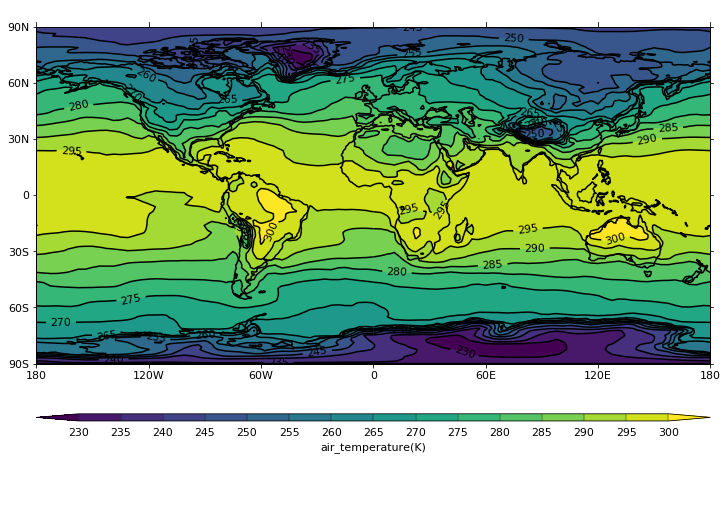

In [35]:
# In-line images
%matplotlib inline
# Turn off warnings
#import warnings
#warnings.filterwarnings("ignore")

import cfplot as cfp
cfp.con(g)

#### `T` is shorthand for *time*

In [36]:
print(f.subspace(T=cf.ge(cf.dt('1967-2-18'))))

Field: air_temperature (ncvar%tas)
----------------------------------
Data            : air_temperature(time(33), latitude(145), longitude(192)) K
Cell methods    : time(33): mean (interval: 30 minutes)
Dimension coords: time(33) = [1967-03-16 12:00:00, ..., 1969-11-16 00:00:00] 365_day
                : latitude(145) = [-90.0, ..., 90.0] degrees_north
                : longitude(192) = [0.0, ..., 358.125] degrees_east
                : height(1) = [2.0] m



In [37]:
print(f.subspace(T=cf.month(4)))

Field: air_temperature (ncvar%tas)
----------------------------------
Data            : air_temperature(time(10), latitude(145), longitude(192)) K
Cell methods    : time(10): mean (interval: 30 minutes)
Dimension coords: time(10) = [1960-04-16 00:00:00, ..., 1969-04-16 00:00:00] 365_day
                : latitude(145) = [-90.0, ..., 90.0] degrees_north
                : longitude(192) = [0.0, ..., 358.125] degrees_east
                : height(1) = [2.0] m



In [38]:
print(f.subspace(time=cf.dt('1965-11-16'), Y=cf.gt(30)))

Field: air_temperature (ncvar%tas)
----------------------------------
Data            : air_temperature(time(1), latitude(48), longitude(192)) K
Cell methods    : time(1): mean (interval: 30 minutes)
Dimension coords: time(1) = [1965-11-16 00:00:00] 365_day
                : latitude(48) = [31.25, ..., 90.0] degrees_north
                : longitude(192) = [0.0, ..., 358.125] degrees_east
                : height(1) = [2.0] m



# 3. The field's data

In [39]:
f.data

<CF Data(120, 145, 192): [[[244.82579040527344, ..., 244.52688598632812]]] K>

#### Get the data as a `numpy` array

In [40]:
print(type(f.array))

<class 'numpy.ndarray'>


In [41]:
f.array

array([[[244.82579041, 244.82579041, 244.82579041, ..., 244.82579041,
         244.82579041, 244.82579041],
        [245.76259871, 245.64571488, 245.52913189, ..., 246.10911099,
         246.01224121, 245.88722523],
        [246.0103291 , 245.86191647, 245.71379773, ..., 246.47294155,
         246.33730691, 246.17361118],
        ...,
        [246.92743832, 246.92339943, 246.91909425, ..., 246.96167234,
         246.95784869, 246.94273518],
        [246.83550681, 246.83572591, 246.8362101 , ..., 246.84365246,
         246.84140166, 246.83832122],
        [246.11326599, 246.11326599, 246.11326599, ..., 246.11326599,
         246.11326599, 246.11326599]],

       [[246.98564148, 246.98564148, 246.98564148, ..., 246.98564148,
         246.98564148, 246.98564148],
        [248.46694996, 248.35942057, 248.25239525, ..., 248.76876914,
         248.68722049, 248.57679331],
        [248.94832661, 248.81420465, 248.68104777, ..., 249.34295834,
         249.23124955, 249.08926564],
        ...,


In [42]:
print(type(f.array))
f.array[-1, 2, -3]

<class 'numpy.ndarray'>


237.00251856000077

In [43]:
g = f.subspace[-1, 2, -3]
g

<CF Field: air_temperature(time(1), latitude(1), longitude(1)) K>

In [44]:
g.array

array([[[237.00251856]]])

In [45]:
x = f.copy()
x.subspace[-1, -1, -1] = -999
x.subspace[-1, -1, -1].array

array([[[-999.]]])

In [46]:
x.subspace[-1, ...] = 888
x.subspace[-1, ...].array

array([[[888., 888., 888., ..., 888., 888., 888.],
        [888., 888., 888., ..., 888., 888., 888.],
        [888., 888., 888., ..., 888., 888., 888.],
        ...,
        [888., 888., 888., ..., 888., 888., 888.],
        [888., 888., 888., ..., 888., 888., 888.],
        [888., 888., 888., ..., 888., 888., 888.]]])

In [47]:
x.subspace[0, ...] = x.subspace[-1, ...] - 111
x.subspace[0, ...].array

array([[[777., 777., 777., ..., 777., 777., 777.],
        [777., 777., 777., ..., 777., 777., 777.],
        [777., 777., 777., ..., 777., 777., 777.],
        ...,
        [777., 777., 777., ..., 777., 777., 777.],
        [777., 777., 777., ..., 777., 777., 777.],
        [777., 777., 777., ..., 777., 777., 777.]]])

### Modify the data where a condition is met
https://ncas-cms.github.io/cf-python/tutorial.html#encapsulating-conditions

In [48]:
print(f)

Field: air_temperature (ncvar%tas)
----------------------------------
Data            : air_temperature(time(120), latitude(145), longitude(192)) K
Cell methods    : time(120): mean (interval: 30 minutes)
Dimension coords: time(120) = [1959-12-16 12:00:00, ..., 1969-11-16 00:00:00] 365_day
                : latitude(145) = [-90.0, ..., 90.0] degrees_north
                : longitude(192) = [0.0, ..., 358.125] degrees_east
                : height(1) = [2.0] m



In [49]:
f.data.stats()

{'min': <CF Data(): 203.62451171875 K>,
 'mean': <CF Data(): 276.5847382914912 K>,
 'max': <CF Data(): 311.89597497768546 K>,
 'range': <CF Data(): 108.27146325893546 K>,
 'mid_range': <CF Data(): 257.7602433482177 K>,
 'standard_deviation': <CF Data(): 20.816570165513593 K>,
 'sample_size': 3340800}

#### Set values below 290 to missing data

In [ ]:
x = f.where(cf.lt(290), cf.masked)
x.data.stats()

In [ ]:
cfp.con(x.subspace[0])

### Manipulate the axes

In [ ]:
f.transpose(['X', 'T', 'Y'])

### Modifying the units

In [ ]:
f = cf.read('ncas_data/IPSL-CM5A-LR_r1i1p1_tas_n96_rcp45_mnth.nc')[0]
f.units, f.mean()

In [ ]:
f.units = 'degC'
f.units, f.mean()

In [ ]:
f.Units # Upper case "U" gives a units object that we can manipulate

In [ ]:
f.Units += 273.15
f.Units, f.units, f.mean()

### Field arithmetic

In [ ]:
f

In [ ]:
f.data.stats()

In [ ]:
g = f + 2
g

In [ ]:
g.data.stats() #min(), g.mean(), g.max()

In [ ]:
g = f - f
g

In [ ]:
g.data.stats()

In [ ]:
x = f.copy()
x.units = 'degC'
x.data

#### Subtract the celcius field from the Kelvin field and check that the result is zero 

In [ ]:
(f - x).mean()

In [ ]:
g = f * x
g

#### Find the anomalies relaitive to the first time

In [ ]:
first_time = f.subspace[0]
first_time = first_time.transpose(['Y', 'T', 'X'])
first_time

In [ ]:
g  = f - first_time
g

In [ ]:
g.data.stats()

# 4. Statistical operations
https://ncas-cms.github.io/cf-python/analysis.html#statistical-collapses

In [ ]:
g = f.collapse('max')
g

In [ ]:
g.data

In [ ]:
g = f.collapse('T: mean')
print(g)
print('data values:\n', g.data)
print('\ntime bounds:\n', g.coord('T').bounds.dtarray)

#### Collapse multiple axes simultaneously

In [ ]:
g = f.collapse('X: Y: sd')
g

#### Collapse an axis into groups, rather than a single value

In [ ]:
g = f.collapse('T: mean', group=cf.seasons())
print(g)

#### `cf.seasons()` is a list of queries, each of which defines a range of months

In [ ]:
cf.seasons()

#### By default, collpases are **not** weighted

In [ ]:
g = f.collapse('area: mean', weights='area') # Area mean for each time
g = g.collapse('T: max')                     # Time maxiumum of the area means
g.data
print(g)

### File aggregation

#### Create a sequence of files on disk, each of which contains one year

In [ ]:
f = cf.read('ncas_data/IPSL-CM5A-LR_r1i1p1_tas_n96_rcp45_mnth.nc')[0]
print(f)
for i in range(10):
    g = f.subspace[12*i:12*(i+1)]
    year = g.coord('T').year.array[0]
    new_file = 'air_temperature_'+str(year)+'.nc'
    cf.write(g, new_file)
    print('    ',new_file)

#### In Ipython `!` preceeeds a shell command

In [ ]:
!ls -o air_temperature_*.nc

In [ ]:
f2 = cf.read('air_temperature_*.nc')
print(f2)

In [ ]:
f.equals(f2[0])

In [ ]:
f3 = cf.read('air_temperature_*.nc', aggregate=False)
f3

# 5. PP and UM fields files

In [ ]:
x = cf.read('ncas_data/aaaaoa.pmh8dec.pp')
x

In [ ]:
print(x[1])

In [ ]:
cf.write(x, 'aaaaoa.pmh8dec.nc')